In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model
model = Sequential([
    Flatten(input_shape =(28,28)),
    Dense(16, activation = 'relu', name = 'layer1'),
    Dense(16, activation = 'relu', name = 'layers2'),
    Dense(10, activation = 'softmax', name = 'layer3')
])


In [4]:
# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
layer1 (Dense)               (None, 16)                12560     
_________________________________________________________________
layers2 (Dense)              (None, 16)                272       
_________________________________________________________________
layer3 (Dense)               (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [6]:
# Build the Sequential convolutional neural network model
model = Sequential([
    Conv2D(16, (3,3),padding= 'SAME', activation = 'relu', input_shape = (28, 28,1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation = 'softmax')
])


In [7]:
# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1296)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                12970     
Total params: 13,130
Trainable params: 13,130
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [8]:
# Define the model optimizer, loss function and metrics
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
scc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',
             metrics=[scc,mae])


In [9]:
# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.metrics)


sparse_categorical_crossentropy
[<tensorflow.python.keras.metrics.SparseCategoricalAccuracy object at 0x7f751828a860>, <tensorflow.python.keras.metrics.MeanAbsoluteError object at 0x7f751828af60>]


***
<a id="coding_tutorial_4"></a>
## The fit method

In [10]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [12]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [13]:
# Print the shape of the training data
train_images.shape

(60000, 28, 28)

In [14]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(train_labels[0])

9


In [15]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images /255
test_images = test_images /255


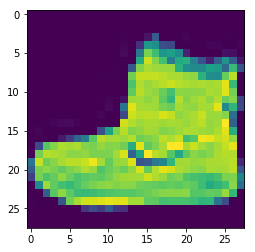

label: Ankle boot


In [16]:
# Display one of the images
i = 0
img = train_images[i,:, :]
plt.imshow(img)
plt.show()
print(f"label: {labels[train_labels[i]]}")

#### Fit the model

In [17]:
# Fit the model
history = model.fit(train_images[..., np.newaxis], train_labels, epochs = 6, batch_size = 256)


Train on 60000 samples
Epoch 1/6
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.5403 - sparse_categorical_accuracy: 0.8138 - mean_absolute_error: 4.4200
Epoch 2/6
60000/60000 [==============================] - 60s 995us/sample - loss: 0.3430 - sparse_categorical_accuracy: 0.8791 - mean_absolute_error: 4.4200
Epoch 3/6
60000/60000 [==============================] - 59s 978us/sample - loss: 0.3072 - sparse_categorical_accuracy: 0.8921 - mean_absolute_error: 4.4200
Epoch 4/6
60000/60000 [==============================] - 59s 975us/sample - loss: 0.2879 - sparse_categorical_accuracy: 0.8981 - mean_absolute_error: 4.4200
Epoch 5/6
60000/60000 [==============================] - 58s 972us/sample - loss: 0.2777 - sparse_categorical_accuracy: 0.9007 - mean_absolute_error: 4.4200
Epoch 6/6
60000/60000 [==============================] - 59s 987us/sample - loss: 0.2694 - sparse_categorical_accuracy: 0.9039 - mean_absolute_error: 4.4200


#### Plot training history

In [18]:
# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
df.head()


,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.540328,0.813800,4.420001
1,0.342970,0.879050,4.420000
2,0.307202,0.892067,4.420000
3,0.287896,0.898067,4.420000
4,0.277716,0.900750,4.420000


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

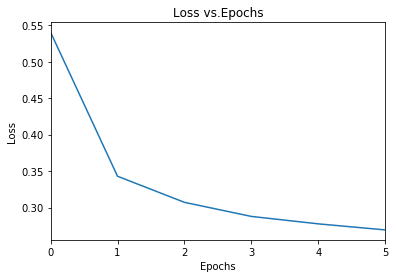

In [19]:
# Make a plot for the loss
loss_plot = df.plot(y="loss", title = "Loss vs.Epochs", legend = False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

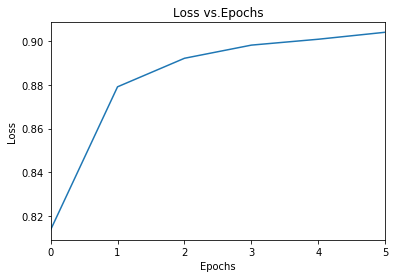

In [21]:
# Make a plot for the accuracy
loss_plot = df.plot(y="sparse_categorical_accuracy", title = "Loss vs.Epochs", legend = False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")


[Text(0, 0.5, 'mae'), Text(0.5, 0, 'Epochs')]

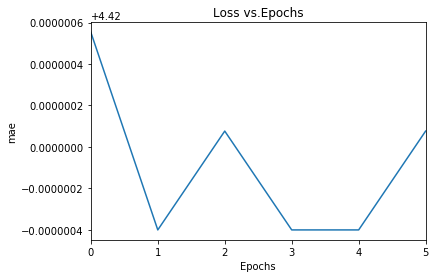

In [22]:
# Make a plot for the additional metric
loss_plot = df.plot(y="mean_absolute_error", title = "Loss vs.Epochs", legend = False)
loss_plot.set(xlabel="Epochs", ylabel="mae")


***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [36]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [26]:
# Evaluate the model
model.evaluate(test_images[..., np.newaxis], test_labels, verbose = 2)


10000/1 - 7s - loss: 0.3811 - sparse_categorical_accuracy: 0.8871 - mean_absolute_error: 4.4200


[0.323307303071022, 0.8871, 4.419997]

#### Make predictions from the model

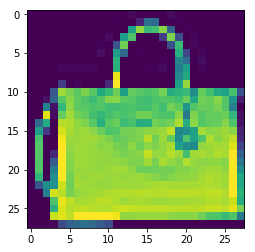

Label: Bag


In [38]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])
inx = 30
test_image = test_images[inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[inx]]}")

In [39]:
# Get the model predictions
predict = model.predict(test_image[np.newaxis,..., np.newaxis])
print(f"model preciction: {labels[np.argmax(predict)]}")

model preciction: Bag
